
# <span style="color:rgb(213,80,0)">Segundo examen parcial semestre 2025\-2</span>

### **Fecha de entrega: 28 de mayo de 2025**
### **Grupo:** 1
### **Profesor:** Erik Peña Medina
###  **Semestre:** 2025\-2
## Integrantes:
-  Cortez Peralta Rafael
-  Hernández Reyes Luis Fernando
-  Gutierrez Melgoza Vicente Jonathan
-  Varela Lopez Alejandro
## Resumen

En este trabajo se abordó la construcción de una trayectoria óptima entre dos puntos definidos en el espacio de trabajo del robot, utilizando una aproximación de tipo bang-bang con mezcla parabólica. Como base del modelo, se desarrollaron las ecuaciones de transformación homogénea que describen de manera simbólica la cinemática directa del SCARA, permitiendo calcular con precisión la posición del efector final en función de los ángulos articulares. Esta formulación matemática fue fundamental para el posterior análisis y simulación del sistema. La simulación numérica se llevó a cabo empleando herramientas como MATLAB y ROS-Gazebo, facilitando tanto la visualización tridimensional del movimiento como la validación de los parámetros articulares a lo largo del tiempo. Mediante el uso de un script en Python que utilizó mensajes JointTrajectory, se logró controlar el movimiento del robot de forma continua y suave. Uno de los aspectos más relevantes fue el análisis del índice de manipulabilidad, el cual permitió evaluar la capacidad del robot para ejecutar movimientos con libertad cinemática, evitando configuraciones singulares o zonas de baja destreza. Este índice se mantuvo en valores adecuados durante la trayectoria propuesta, lo que confirmó la viabilidad funcional del sistema.
## Contenido
-  Introducción
-  Descripción del problema
-  Propuesta de solución
-  Experimentos o simulaciones
-  Resultados
-  Conclusiones

## Funciones


In [1]:
clear
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]

## Introducción

La planificación de trayectorias constituye un pilar fundamental en la optimización del rendimiento y la funcionalidad de robots industriales avanzados y en diversas aplicaciones de automatización. El propósito principal de la generación de trayectorias es definir los comandos de control que guían a un robot, en este caso un manipulador SCARA, hacia una pose deseada logrando así que su efector final siga una ruta específica y sea capaz de cumplir alguna tarea en el camino.


La planificación de trayectorias debe garantizar el cumplimiento de las restricciones de las articulaciones del manipulador (límites de posición, velocidad y aceleración), así como a las restricciones dinámicas del sistema (inercia y par). A su vez, la planificación de trayectorias puede hacerse para diversos enfoques y depende de lo que se pretende lograr con el comportamiento del robot. Uno de los enfoques es cuando se busca la eficiencia temporal, es decir, minimizar el tiempo total de ciclo para lograr movimientos rápidos, esto se consigue al explotar al máximo los límites cinemáticos del robot. Otro enfoque es la precisión del movimiento en donde se buscan perfiles de velocidad y aceleración continuos para prevenir vibraciones, reducir el desgaste del equipo y mantener la precisión de posicionamiento.


Uno de los retos principales en el diseño de trayectorias es la búsqueda de la eficiencia temporal en conjunto con la precisión del movimiento, pues resulta difícil conseguirlo ya que una mayor velocidad de movimiento impulsa a los eslabones que conforman al robot a operar en los límites de sus capacidades de aceleración lo que trae como consecuencia discontinuidades en la aceleración que se traducen en vibraciones de la estructura del robot disminuyendo la precisión de posicionamiento, un aumento del desgaste de los componentes y, en algunos casos, daños al robot. Es por ello por lo que la planificación de trayectorias busca un equilibrio óptimo entre la velocidad de ejecución, la preservación de la precisión y durabilidad del robot.

## Descripción del problema

La trayectoria "Bang\-Bang Parabolic Blend" es fundamental en la teoría de control, se caracteriza por su cambio súbito durante la trayectoria. Un controlador "bang\-bang" es un tipo de controlador de retroalimentación que alterna de manera instantánea entre dos estados extremos de una señal de control y se asemeja a un sistema "on\-off". Para sistemas dinámicos simplificados, la solución de control óptimo implica dos "bangs". Esto significa que se aplica una aceleración extrema durante intervalos de tiempo acotados.


A pesar de su eficiencia teórica en la minimización del tiempo, la implementación física del control "bang\-bang" conlleva importantes implicaciones prácticas y puede presentar complicaciones, un ejemplo es que al tener una señal de control discontinua puede generar una señal de error oscilante alrededor del punto de ajuste deseado; también, los cambios abruptos en la señal de control pueden provocar fenómenos físicos como picos elevados de corriente eléctrica, calentamiento súbito del robot y con ello la expansión térmica de componentes metálicos.

## Propuesta de solución

Las trayectorias "bang\-bang" se construyen a partir de la intersección de las parábolas que se producen cuando existe la aplicación de una aceleración constante hasta un punto crítico en el cual se debe aplicar una desaceleración que nos permita llegar al punto de interés con precisión con respecto a la posición del efector final, lo que permite visualizar los segmentos de aceleración y deceleración máximas que componen la trayectoria óptima.

## Hipótesis

Existe una trayectoria en el espacio de trabajo del robot que nos permite  llegar de un punto p1 a un punto p2,  que permita a un robot scara mantener su capacidad de maníulabilidad en un valor alto, a lo largo de la trayectoria realizada.

## Obejtivo

Diseñar una trayectoria de mezcla parabólica tipo "bang\-bang" que permita a un robot scara mover un objeto de un punto P1 a un punto P2, manteniendo su índice de manipulabilidad (w) dentro de un rango de 0.7 a 1 el mayor tiempo posible de la simulación.

## Metas
-  Plantear el modelo cinemático directo e inverso del robot SCARA.
-  Determinar el tipo de trayectoría parámetrizada a utilizar.
-  Establecer los parámetros del robot y lugar geometrico de la trayectoría (fijos).
-  Definir los parámetros de simulación (variables).
-  Calcular el índice de manipulabilidad.
-  Realizar la simulación del robot.
-  Analizar los resultados obtenidos.
-  Conclusiones.

## Planteamiento del modelo cinemático del robot

\*\*\*Modelo cinemático directo de la postura:


In [2]:
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1

T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1);
T_1_2 = Tij(L_1,0,0,0,0,theta_1_2);
T_2_3 = Tij(L_2,0,0,0,0,theta_2_3);
T_3_P = Tij(L_3,0,0,0,0,0);
T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P)

In [3]:
p_0_P=[T_O_P(1,4);T_O_P(2,4)]

In [4]:
xi_O_P = [p_0_P;theta_O_1+theta_1_2+theta_2_3]



## Descripción del experimento

El desarrollo de este segundo examen parcial está centrado en la implementación de una trayectoria en un manipulador serial 3R en un entorno tridimensional bajo ROS, cuyo análisis y planteamiento durante el semestre representó múltiples retos para el modelado geométrico, análisis cinemático y simulación robótica. A partir de la definición estructural en URDF, se estableció un modelo virtual para la configuración articulada del robot, permitiendo su visualización y manipulación dentro de un entorno simulado.


Desarrollando los modelos matemáticos correspondientes a la cinemática directa de la postura y de las velocidades, logramos entender las relaciones funcionales entre el espacio articular y el espacio tridimensional. Asimismo, al resolver la cinemática inversa logramos calcular las configuraciones articulares necesarias para alcanzar una posición deseada del efector final, validando los resultados mediante una simulación dinámica. Aplicando el control de movimiento en las articulaciones se busca demostrar la viabilidad de la solución propuesta la cual se desarrolló a partir de la trayectoria mezcada parabólica "bang\-bang" presentada en el artículo  *"OPTIMUM TRAJECTORY FUNCTION FOR  MINIMUM  ENERGY REQUIREMENTS OF A SPHERICAL ROBOT"* \[4\]. Para la trayectoria a desarrollar se utilizan dos funciones las cuales son válidas únicamente en un rango de tiempo establecido a partir del tiempo de simulación concurrido y el tiempo de simulación total; las funciones que definen la trayectoria a evaluar son:

### $P(t)=P_0 +\frac{2\cdot t^2 }{t_f ^2 }\cdot (P_f -P_0 )$ ,   válida cuando   $0\le t\le \frac{t_f }{2}$
### $P(t)=P_0 +\frac{2\cdot t^2 }{t_f ^2 }\cdot (P_f -P_0 )$ ,   válida cuando   $0\le t\le \frac{t_f }{2}$

Para la simulación del robot se busca que el efector final pase de un punto $P_1$ a un punto $P_2$ , para ello se definen los siguientes parámetros fijos del robot:

-  $\displaystyle L_1 =0.5\,[m]$
-  $\displaystyle L_2 =0.5\,[m]$
-  $\displaystyle L_3 =0.3\,[m]$

Los puntos $P_1$ y $P_2$ están definidos por:


 $P_1$ :

-  $\displaystyle x_{in} =0.4\,[m]$
-  $\displaystyle y_{in} =-0.1\,[m]$

 $P_2$ :

-  $\displaystyle x_{fin} =0.0\,[m]$
-  $\displaystyle y_{fin} =-1.3\,[m]$

Además, los parámetros de trayectoria son aquellos que cambian con el paso del tiempo, uno de ellos es la posición del efector final en $P_1$ y $P_2$ está dada por:


En $P_1$ :

-  $\displaystyle ^p \theta_{in} =\frac{\pi }{2}\,[rad/s]$

En $P_2$ :

-  $\displaystyle ^p \theta_{fin} =-\frac{\pi }{2}\,[rad/s]$

Para la simulación se propone el tiempo de total de simulación ( $t_f$ ) y el intervalo de tiempo en el que se realiza cada cambio ( $t_{in}$ ), mientras más corto sea el intervalo la simulación es más fluida:

-  $\displaystyle t_f =20\,[seg]$
-  $\displaystyle t_{in} =0.1\,[seg]$

Con esto podemos asegurar que el cálculo de la cinemática del robot durante la simulación se realizará durante un intervalo de tiempo $0\,[seg]\le t\le 20\,[seg]$ en intervalos de $0.1\,[seg]$ , es decir, realizará 200 veces dicho cálculo.


A partir de los parámetros se define el lugar geométrico de trayectoria:



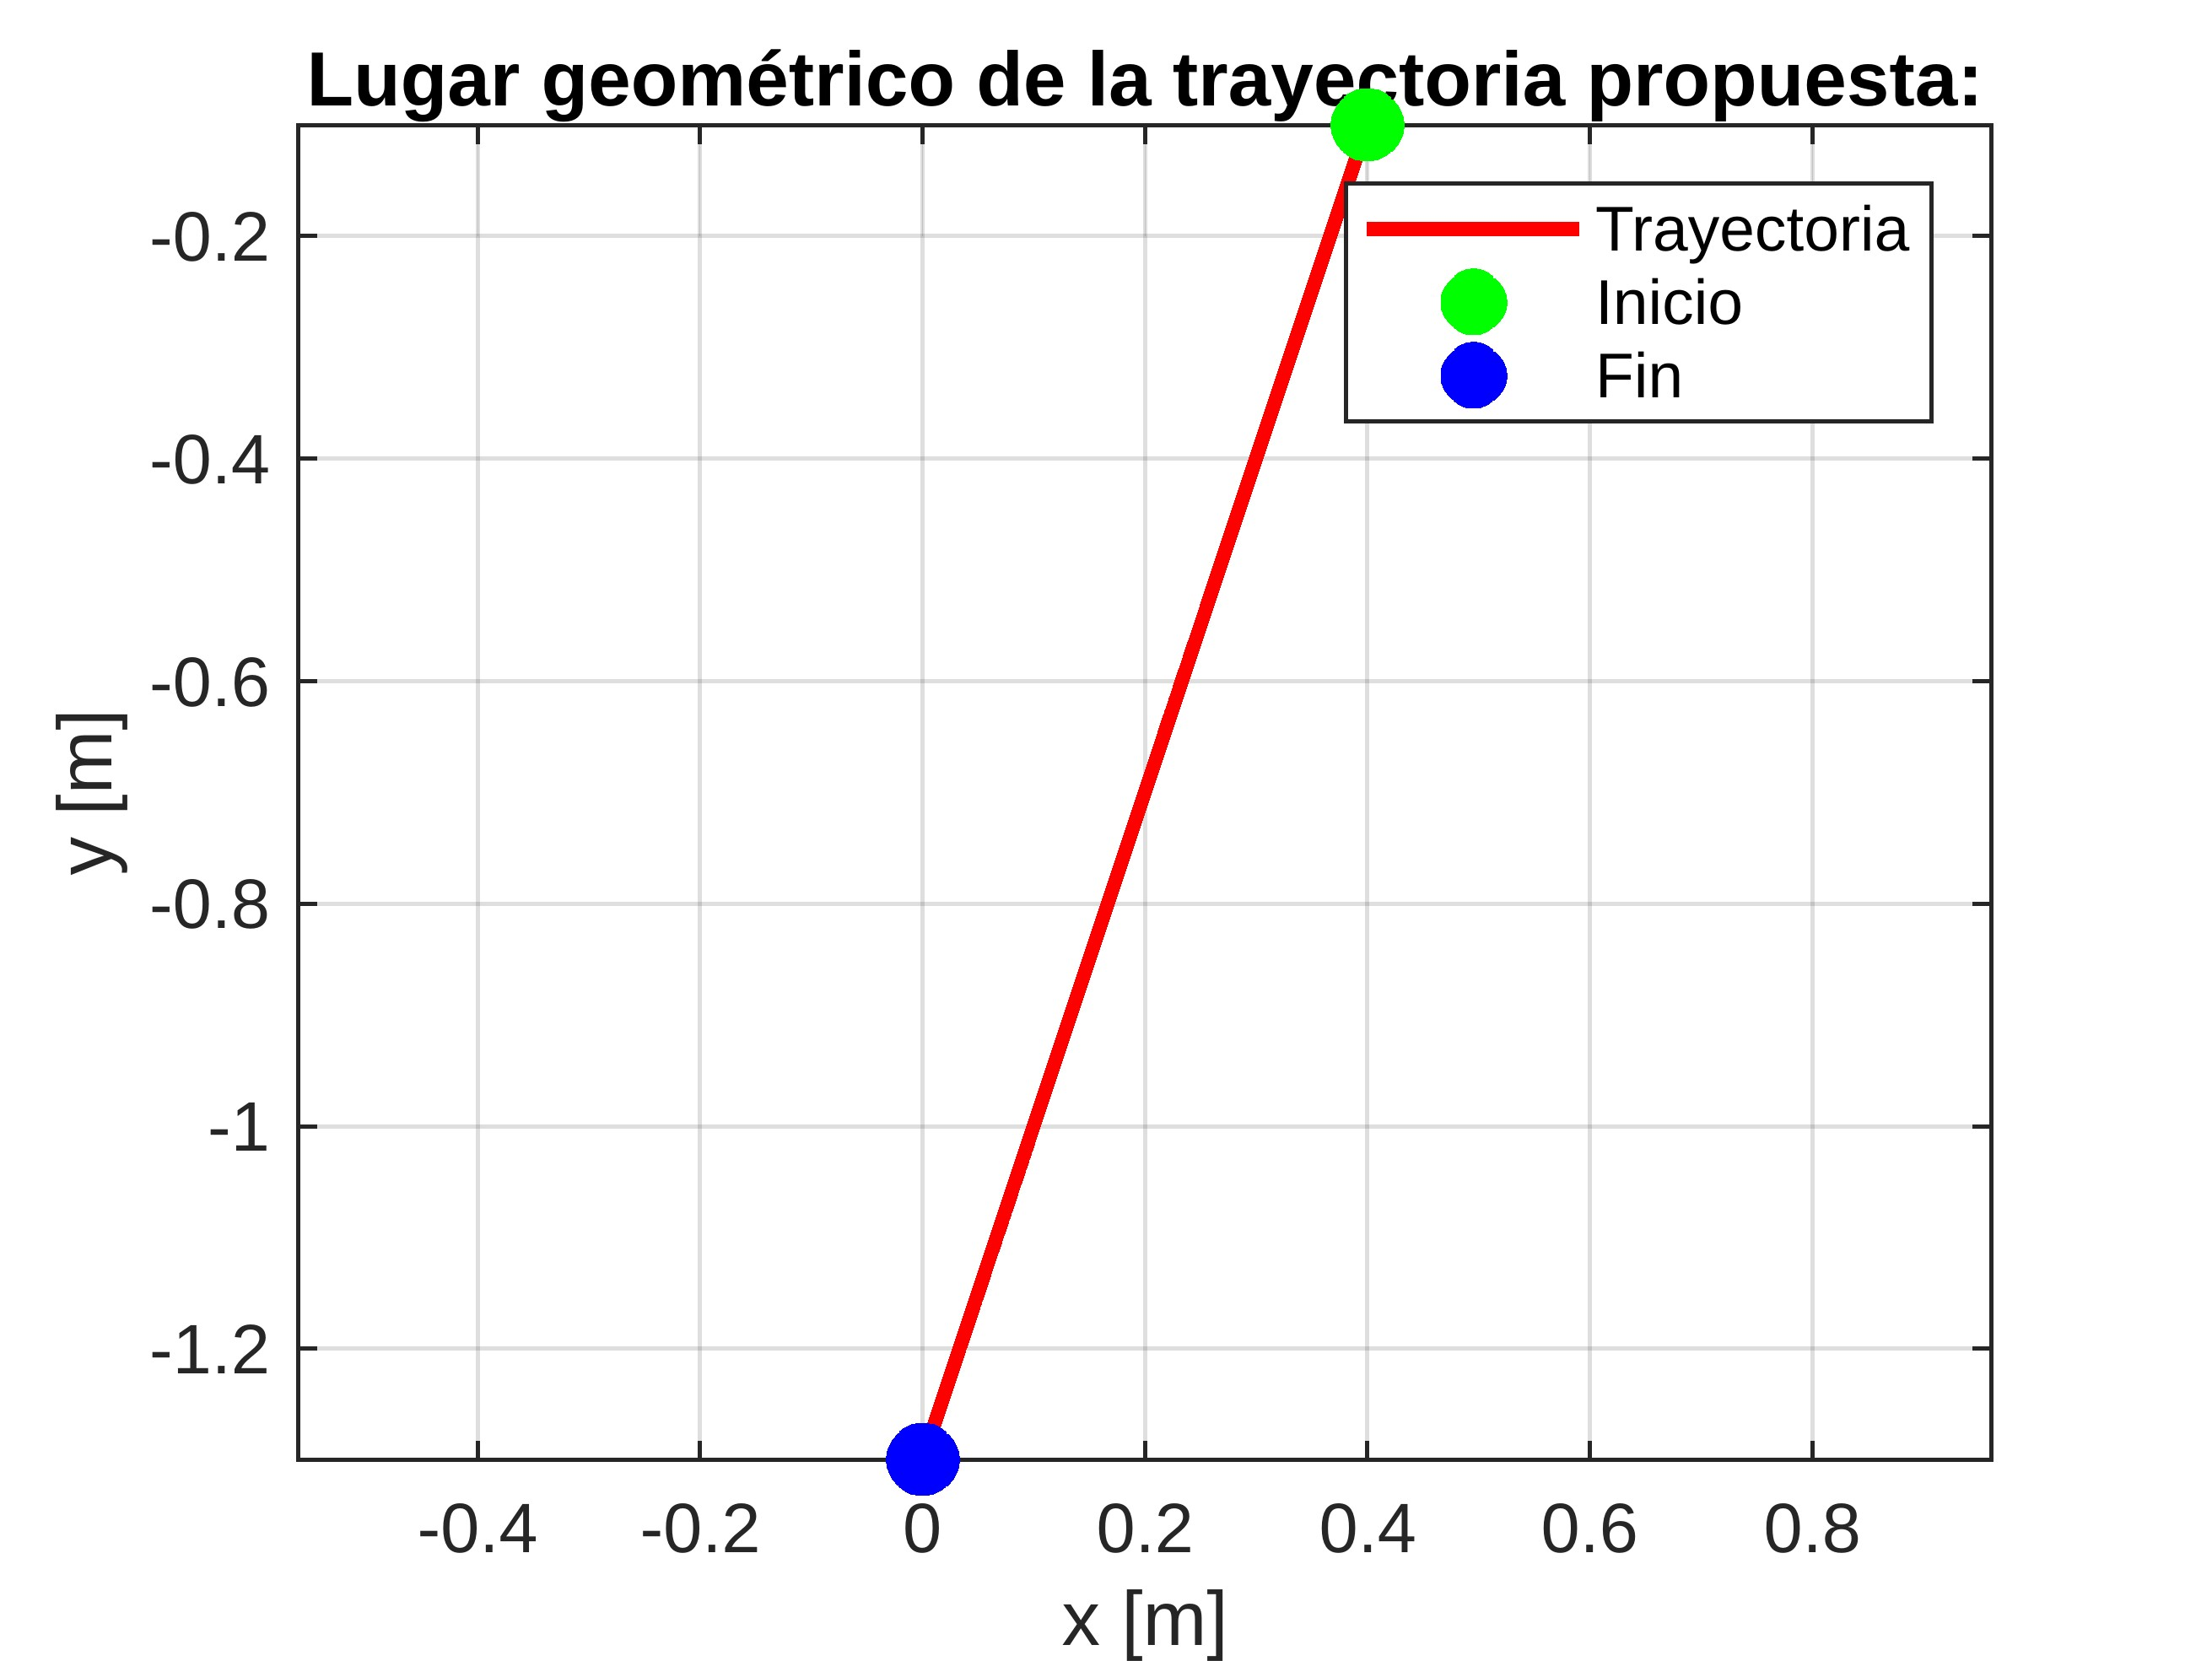

In [5]:
% Parametros del robot
L1 = 0.5;
L2 = 0.5;
L3 = 0.3;

%Punto inicial
x_in = 0.4;
y_in = -0.1;

%Punto final
x_fin = 0.0;
y_fin = -1.3;

%Definición de los parámetros de la trayectoria
t_total = 20;%s
t_in = 0.1; %S
t_sim = 0:t_in:t_total;
theta_P_1 = pi/2;
theta_P_2 = -pi/2;

% Inicialización de trayectorias
xp = zeros(size(t_sim));
yp = zeros(size(t_sim));

% Generar trayectoria Bang-Bang Parabolic Blend
for i = 1:length(t_sim)
    t = t_sim(i);
    if t <= t_total / 2
        xp(i) = x_in + (2 * t^2 / t_total^2) * (x_fin - x_in);
        yp(i) = y_in + (2 * t^2 / t_total^2) * (y_fin - y_in);
        theta_P(i) = theta_P_1 + (2 * t^2 / t_total^2) * (theta_P_2 - theta_P_1);
    else
        xp(i) = x_fin + ((4 * t / t_total - 2 * t^2 / t_total^2) - 2) * (x_fin - x_in);
        yp(i) = y_fin + ((4 * t / t_total - 2 * t^2 / t_total^2) - 2) * (y_fin - y_in);
        theta_P(i) = theta_P_2 + ((4 * t / t_total - 2 * t^2 / t_total^2) - 2) * (theta_P_2 - theta_P_1);
    end
end

% Graficar la trayectoria en el plano XY
figure;
plot(xp, yp, 'r', 'LineWidth', 2);
hold on;
plot(x_in, y_in, 'go', 'MarkerSize', 10, 'MarkerFaceColor', 'g');
plot(x_fin, y_fin, 'bo', 'MarkerSize', 10, 'MarkerFaceColor', 'b');
xlabel('x [m]');
ylabel('y [m]');
title('Lugar geométrico de la trayectoria propuesta:');
legend('Trayectoria', 'Inicio', 'Fin');
axis equal;
grid on;

## Solución de la cinemática inversa.

Para calcular el índice de manipulabilidad es necesario definir la cinemática inversa de la postura, ya que tenemos una configuración deseada, definda por los puntos P1 y P2.


Para determinar la configuracion del Scara, se utilizan las leyes de cosenos, de senos y el teorema de Pitágoras.

<p style="text-align:left">
   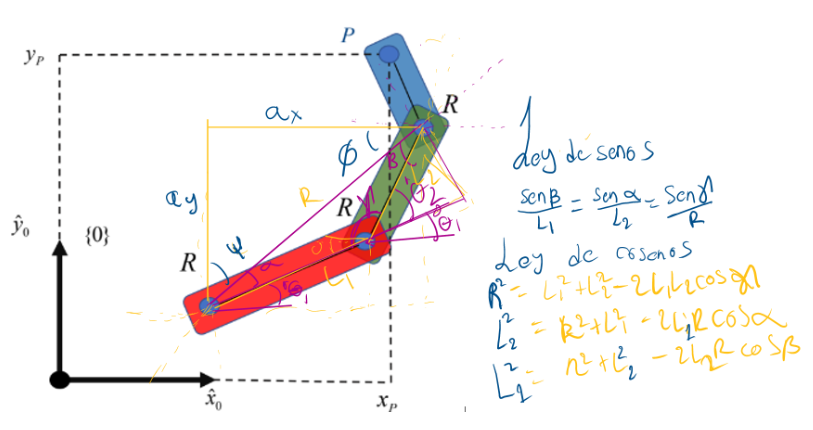
</p>



Utilizando el teorema de Pitágoras, es posible determinar la magnitud del vector R, que representa la distancia entre el sistema 1 y el sistema 2 del triángulo formado por las longitudes de los eslabones.

\matlabheadingthree{
$$R=\sqrt{x_3 ^2 -y_3 ^2 }$$}

Para sacar el valor de theta\_1\_2, se puede ver que el valor de gamma está estrechamente relacionado, ya que la suma de los dos ángulos da Pi, en consecuencia:

\matlabheadingthree{
$$\theta_2 =\pi -acos\,\left(\frac{R^2 -L_1 ^2 -L_2 ^2 }{2\cdot L_1 \cdot L_2 }\right)$$}

Para encontrar la expresión de $^0 \theta_1$ se calcula el ángulo alfa ( $\alpha$ ) y Psi ( $\psi$ ).


Para alfa ( $\alpha$ ) se utiliza el triángulo rectángulo formado por el sistema de coordenadas uno y tres que pasa por el sistema dos. Para ello se emplea la definición de coseno. Este concepto se ocupa en triángulo pequeño y luego en el grande.

<p style="text-align:left">
   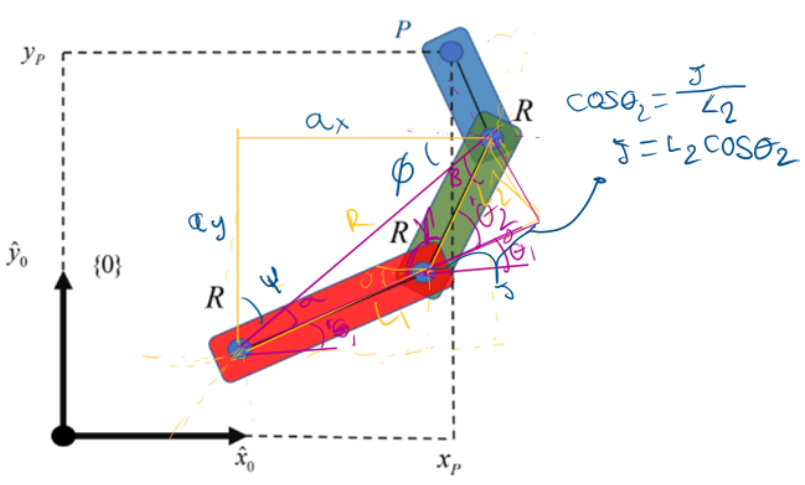
</p>



In [6]:
for i=1:length(t_sim)
    % Solución de la cinematica inversa de la postura del robot
    x3 = xp(i) - L3*cos(theta_P(i));
    y3 = yp(i) - L3*sin(theta_P(i));
    R = sqrt(x3^2 + y3^2);
    theta2(i) = pi-acos((R^2-L1^2-L2^2)/(2*L1*L2));
    alfa = acos((x3^2+y3^2+L1^2-L2^2)/(2*L1*sqrt(x3^2+y3^2)));
    phi = atan2(y3, x3);
    theta1(i) = alfa-phi;
    theta3(i) = theta_P(i) - theta1(i) - theta2(i);
    % calculo de w[i]
    w(i) = abs(sin(theta2(i)));
end


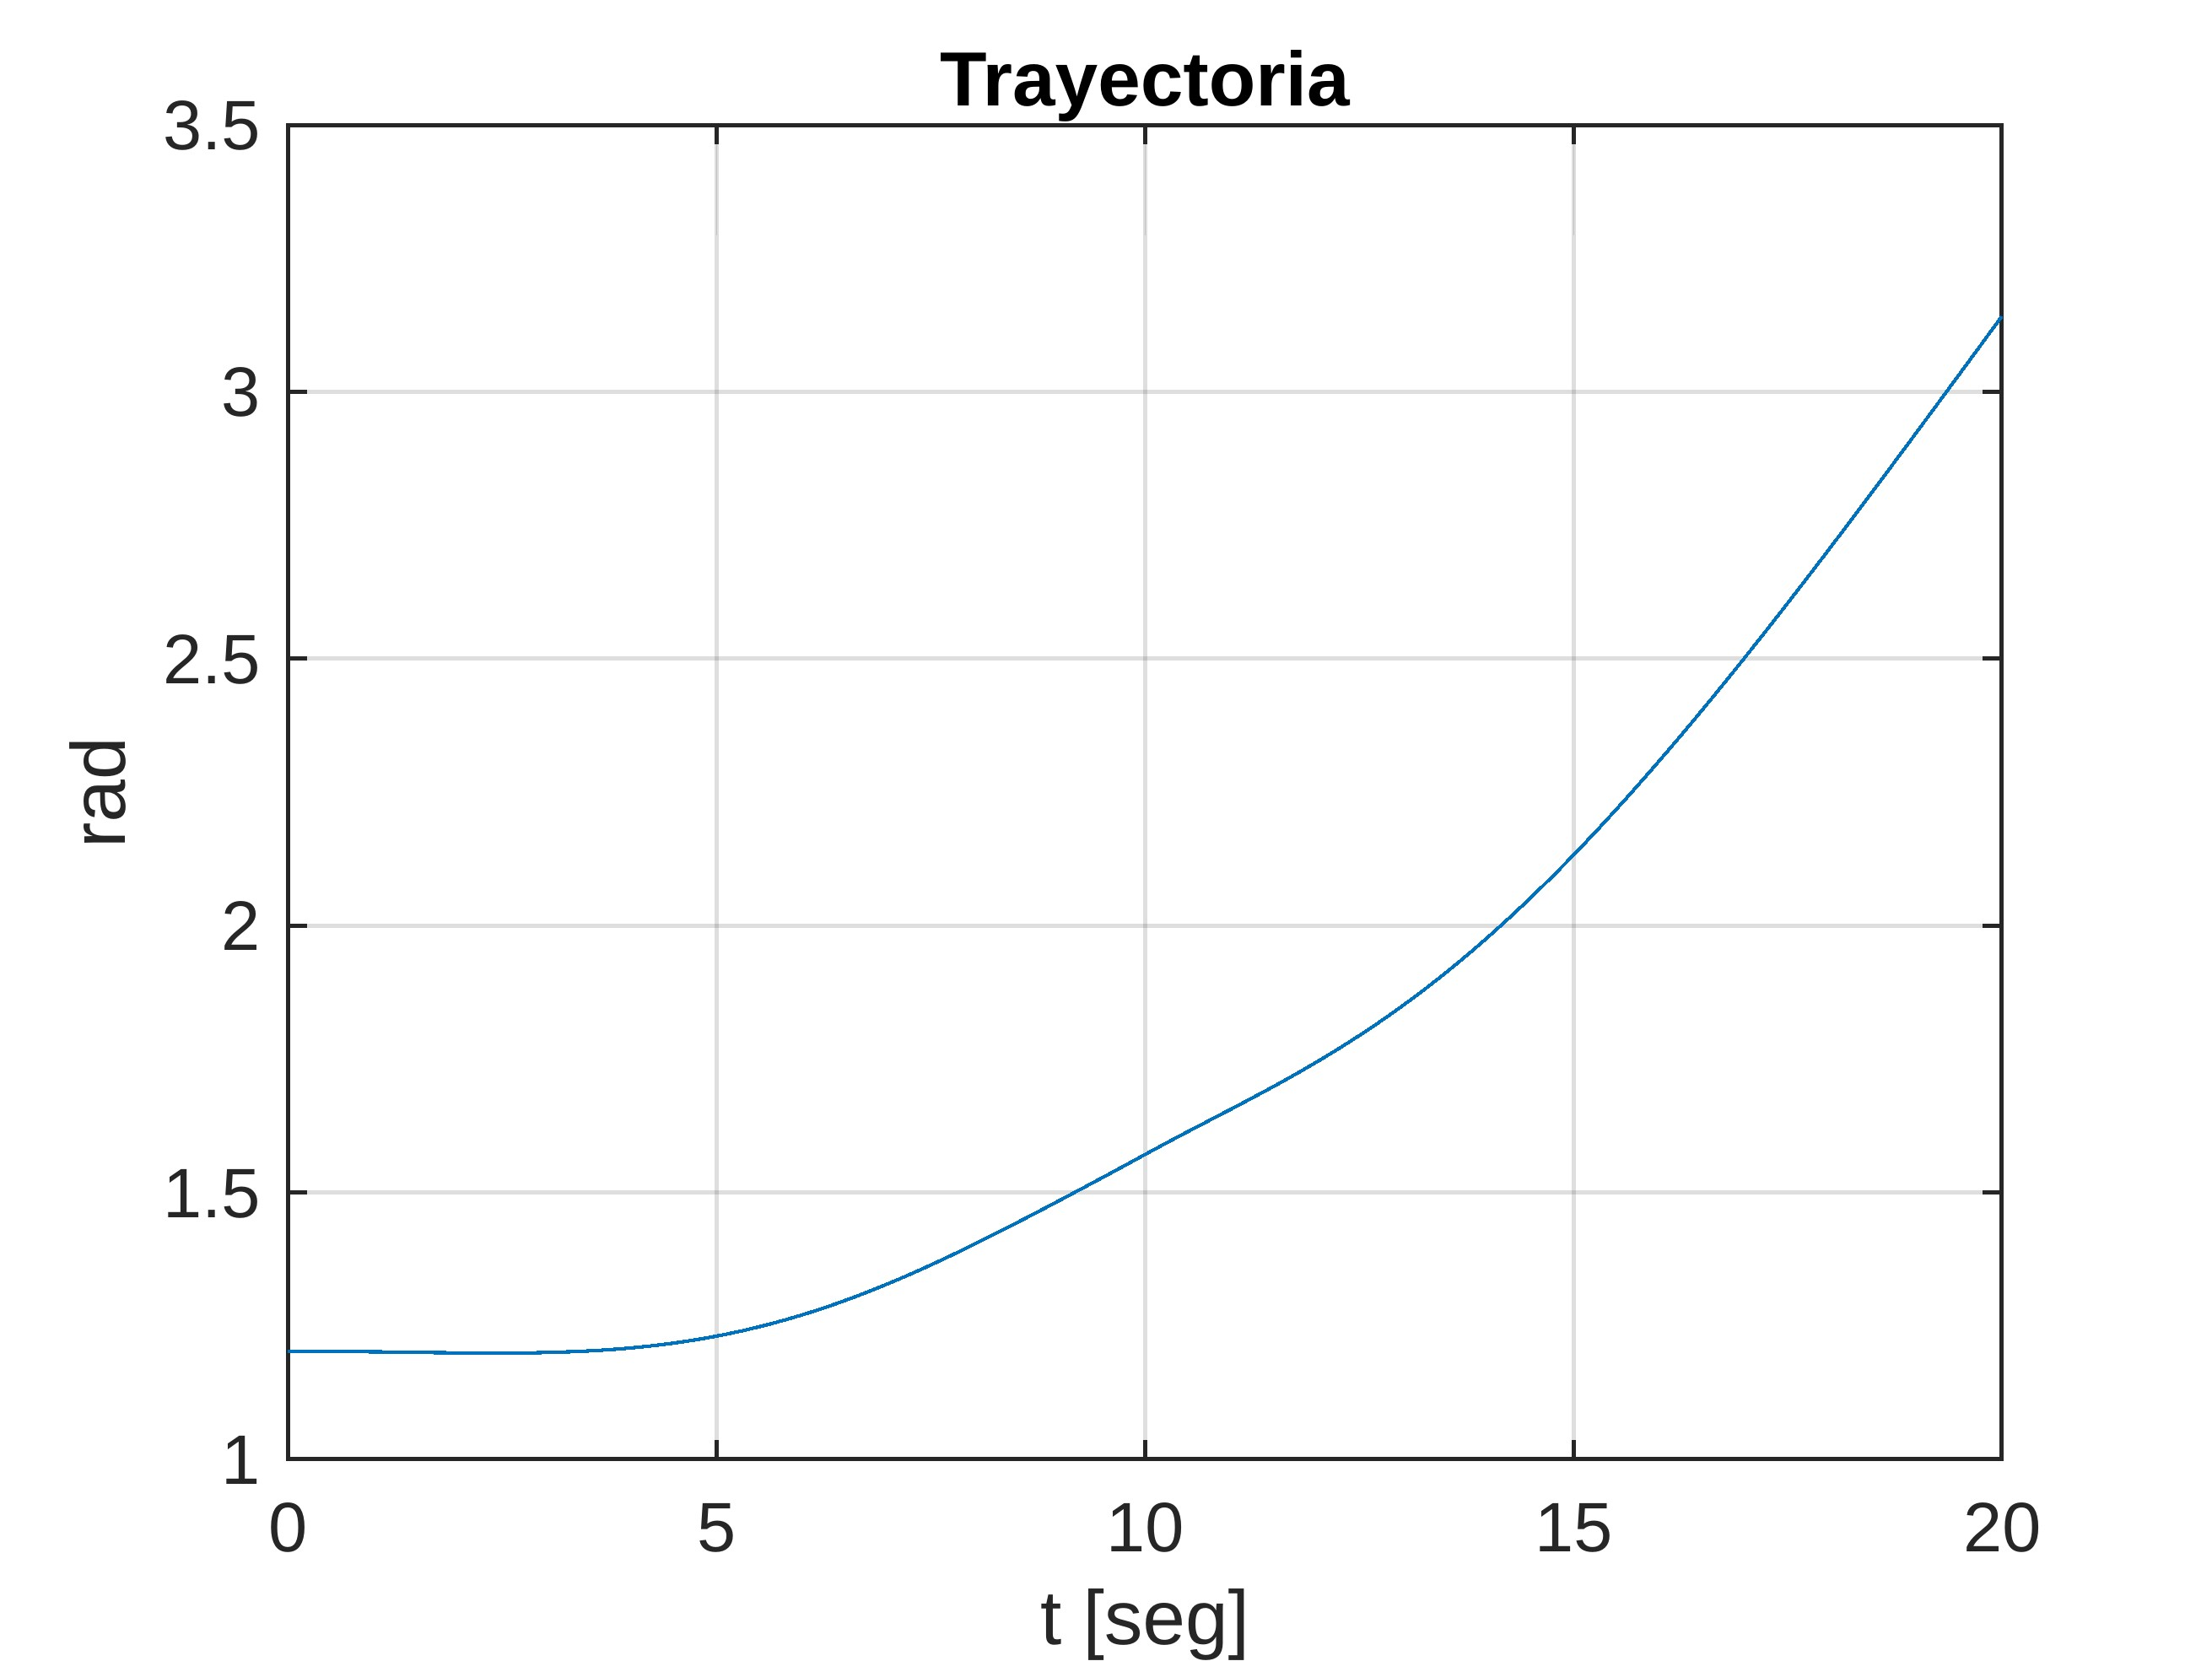

In [7]:
figure;
plot(t_sim, theta2)
hold on;
title('Trayectoria')
xlabel('t [seg]')
ylabel('rad')
grid on;


\*\*\*Gráfica 2: Índice de manipulabilidad.



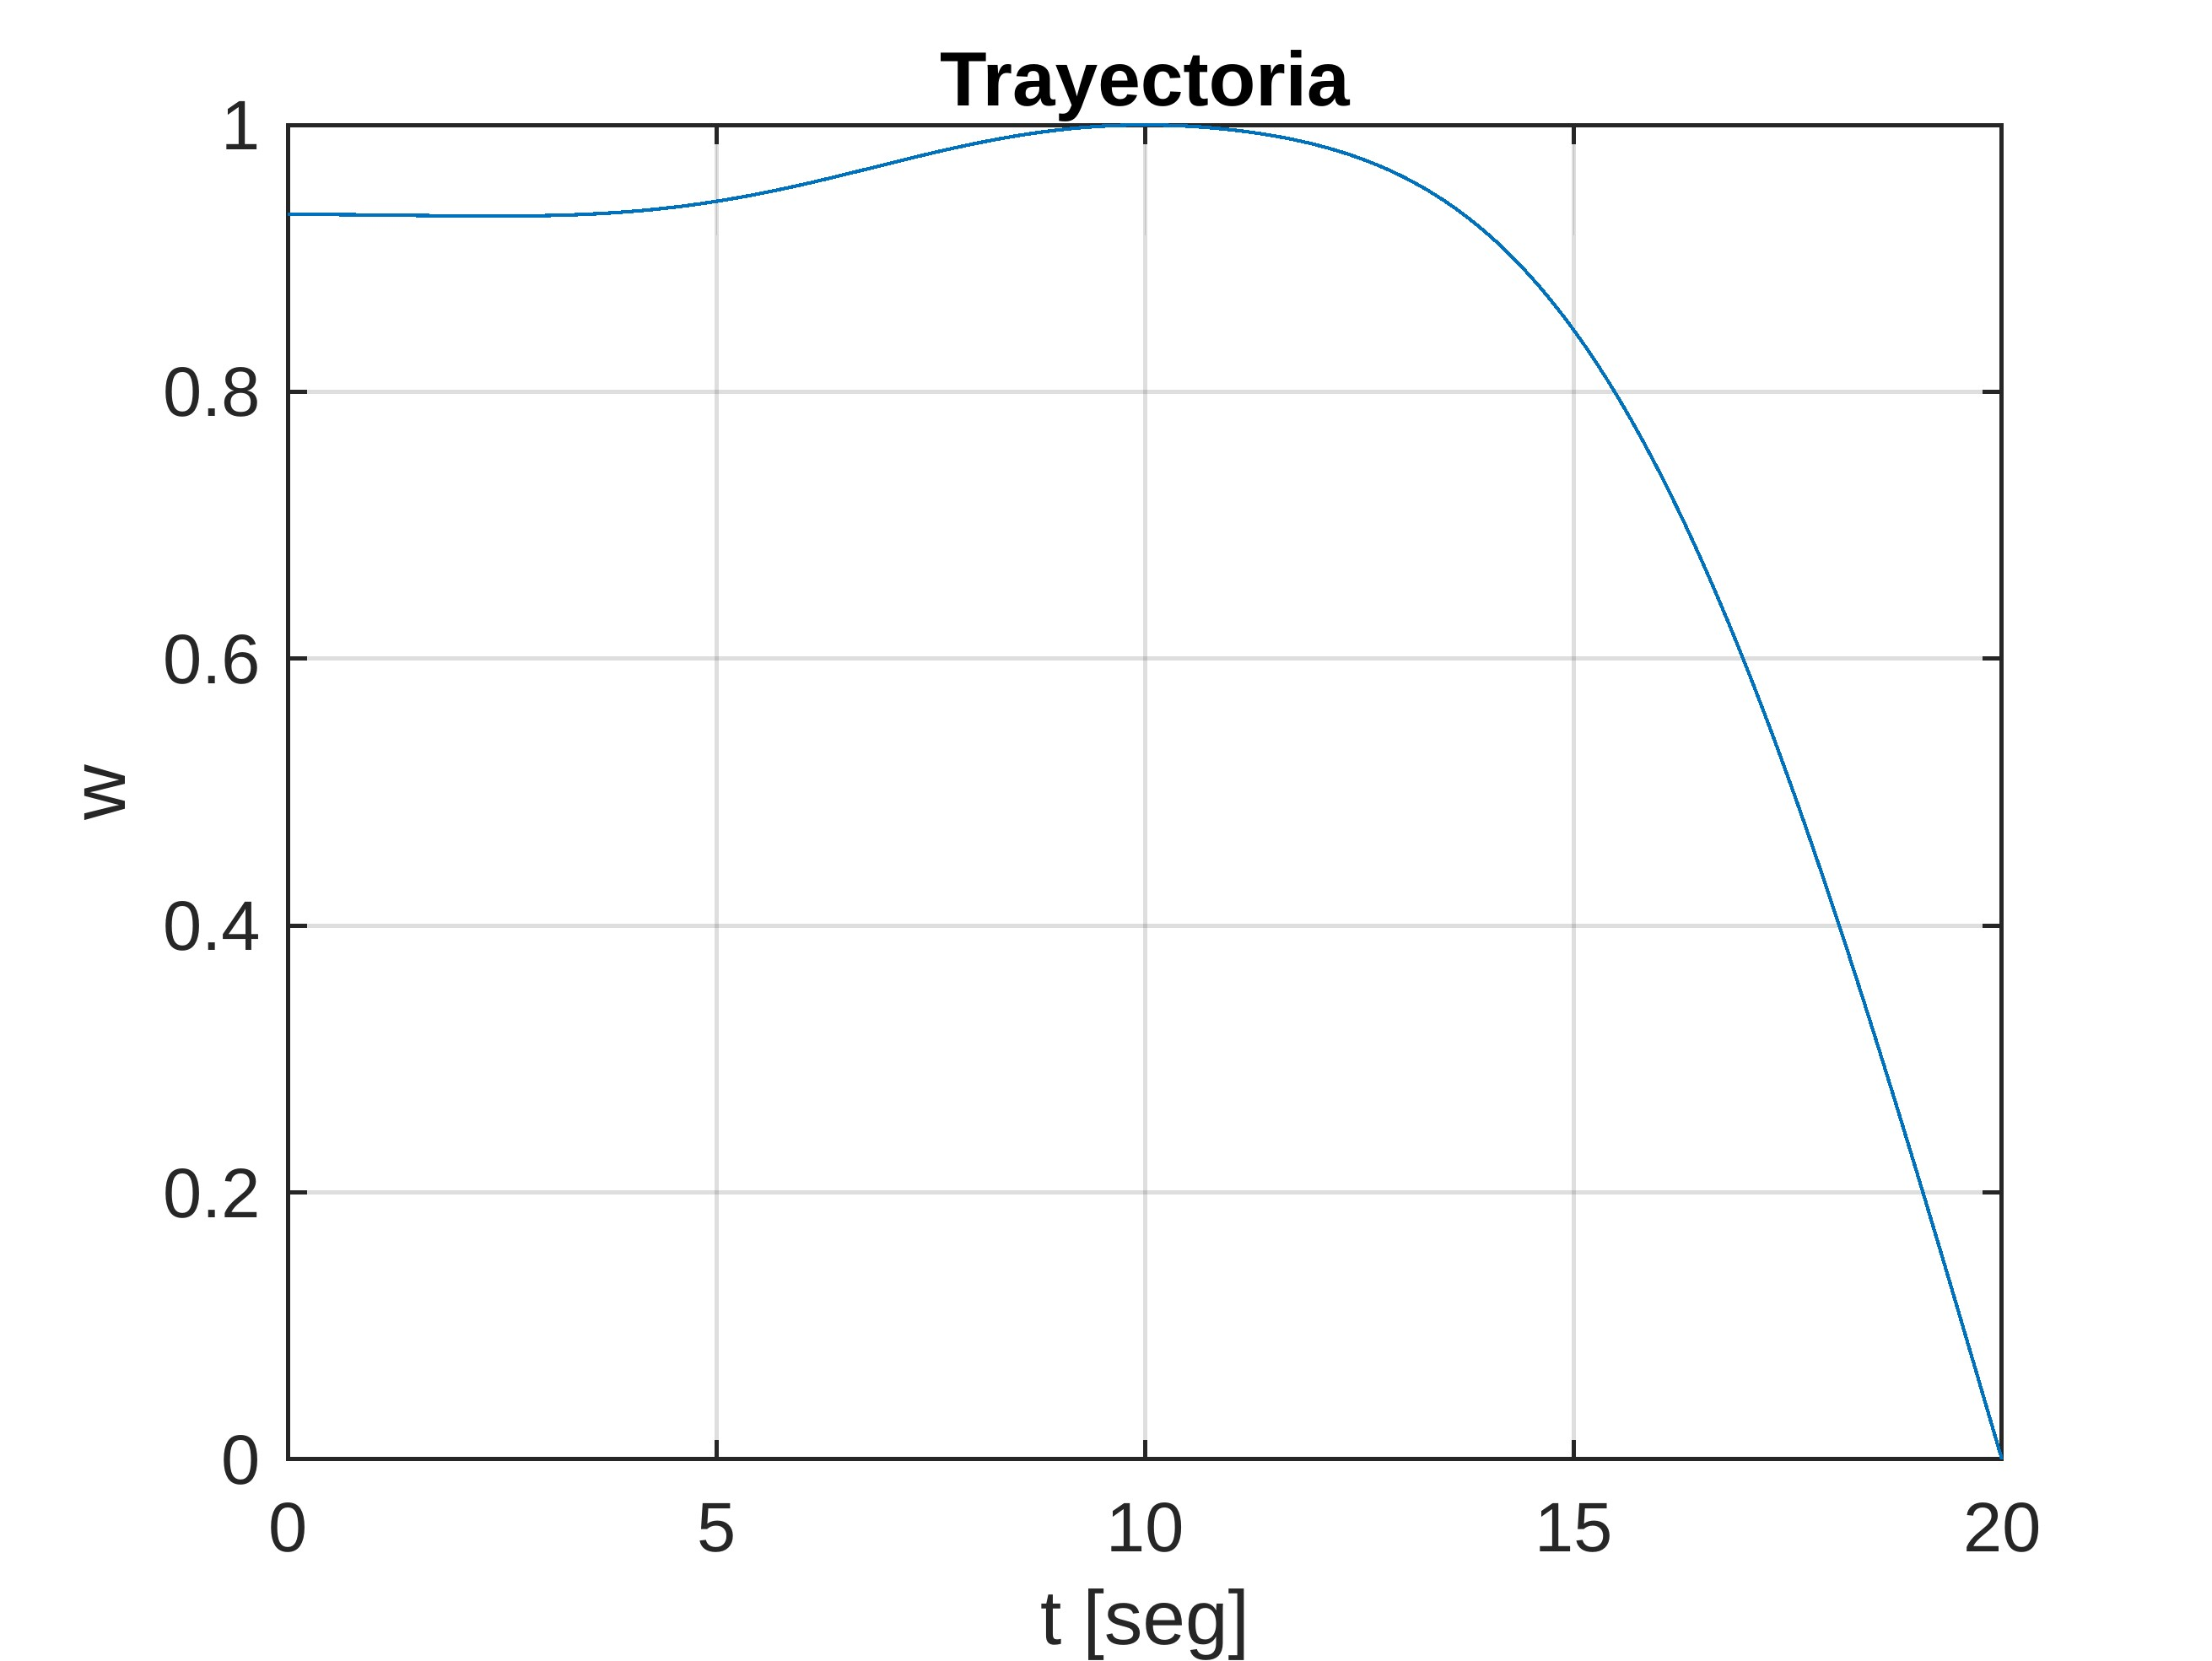

In [8]:
figure;
plot(t_sim, w)
hold on;
title('Trayectoria')
xlabel('t [seg]')
ylabel('w')
grid on;

## Conclusiones
A partir del desarrollo del modelo cinemático del robot SCARA, se diseñó una trayectoria que permite desplazar el efector final desde un punto inicial P1 hasta un punto final P2 dentro del espacio de trabajo. El modelo se construyó utilizando transformaciones homogéneas en simbología de MATLAB, y se abordaron tanto la cinemática directa como la inversa de la postura, lo que permitió definir y resolver con precisión las posiciones articulares del robot en cada instante de la trayectoria. La trayectoria se generó mediante el algoritmo Bang-Bang Parabolic Blend, que permitió una transición suave entre los puntos, considerando parámetros como tiempo total de ejecución, condiciones iniciales y finales, así como la continuidad de velocidad. Las gráficas obtenidas muestran la evolución de las coordenadas del efector en el plano XY, así como la evolución de los ángulos articulares y del índice de manipulabilidad a lo largo del movimiento.
## Conclusiones individuales
Gutierrez Melgoza Vicente Jonathan. Uno de los principales aprendizajes fue comprender cómo una trayectoria teóricamente óptima puede verse afectada por limitaciones físicas reales, como el calentamiento de componentes, las oscilaciones de control o la respuesta de los actuadores.Además, se valoró la importancia del índice de manipulabilidad como herramienta de evaluación funcional a lo largo de la trayectoria, permitiendo asegurar que el robot opere en condiciones cinemáticamente favorables. También se reconoció el papel fundamental de las simulaciones como espacio seguro para experimentar con parámetros y observar el comportamiento del sistema antes de cualquier implementación física.Sin embargo, el desarrollo del proyecto también presentó desafíos significativos. Entre ellos, destacan la necesidad de una correcta parametrización de la trayectoria para evitar aceleraciones no deseadas, así como la precisión en la codificación del script de control en ROS. La interpretación e implementación de modelos matemáticos complejos, junto con la sincronización de módulos en distintos lenguajes de programación (Python, MATLAB, URDF), supuso una curva de aprendizaje técnica importante.
## Referencias

\[1\] G. B. Muniyandi, “Citation: Muniyandi GB (2024) In\-Depth Analysis of Kinematic, Dynamic, and Control Aspects of a 4\-Axis SCARA Robot Manipulator,” Int J Robot Eng, vol. 7, p. 37, 2024, doi: 10.35840/2631\-5106/4137.


\[2\] C. Feng, G. Gao, and Y. Cao, “Kinematic modeling and verification for a SCARA robot,” 2016.


\[3\] B. Fernini, “Dynamic Behavior of a SCARA Robot by using N\-E Method for a Straight Line and Simulation of Motion by using Solidworks and Verification by Matlab/Simulink,” International Journal of Robotics and Automation (IJRA), vol. 3, no. 4, pp. 221–233, 2014.


\[4\] S. A. Alshahrani, H. Diken, A. A. N Aljawi, S. Alshahrani, y A. Aljawi, “OPTIMUM TRAJECTORY FUNCTION FOR MINIMUM ENERGY REQUIREMENTS OF A SPHERICAL ROBOT”, 2002.

